In [2]:
import pandas as pd


1. Loading the data

In [3]:
data = pd.read_csv('insurance.csv')
data.head(10)

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


2. Understanding the dataset

In [4]:
data.shape

(1338, 7)

In [33]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data.isnull()

,age,gender,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [6]:
data.isnull().sum()

age         0
gender      0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

column types using dtypes

In [36]:
data.dtypes

age           int64
gender       object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

3. Data Preprocessing

Converting object types to category types


In [7]:
data['gender'] = data['gender'].astype('category')
data['region'] = data['region'].astype('category')
data['smoker'] = data['smoker'].astype('category')

In [8]:
data.dtypes

age            int64
gender      category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


4. Data Visualization

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

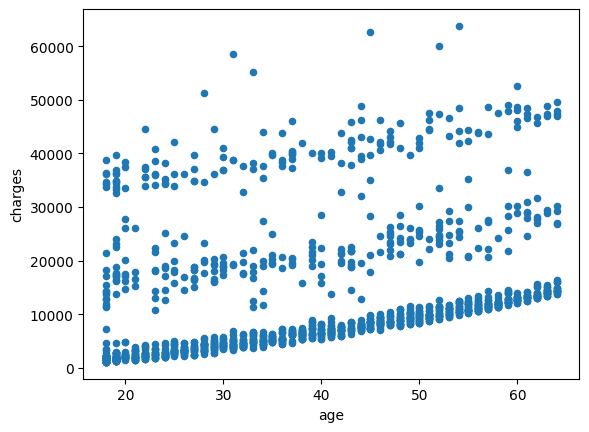

In [10]:
data.plot.scatter(x='age',y= 'charges')
plt.show()

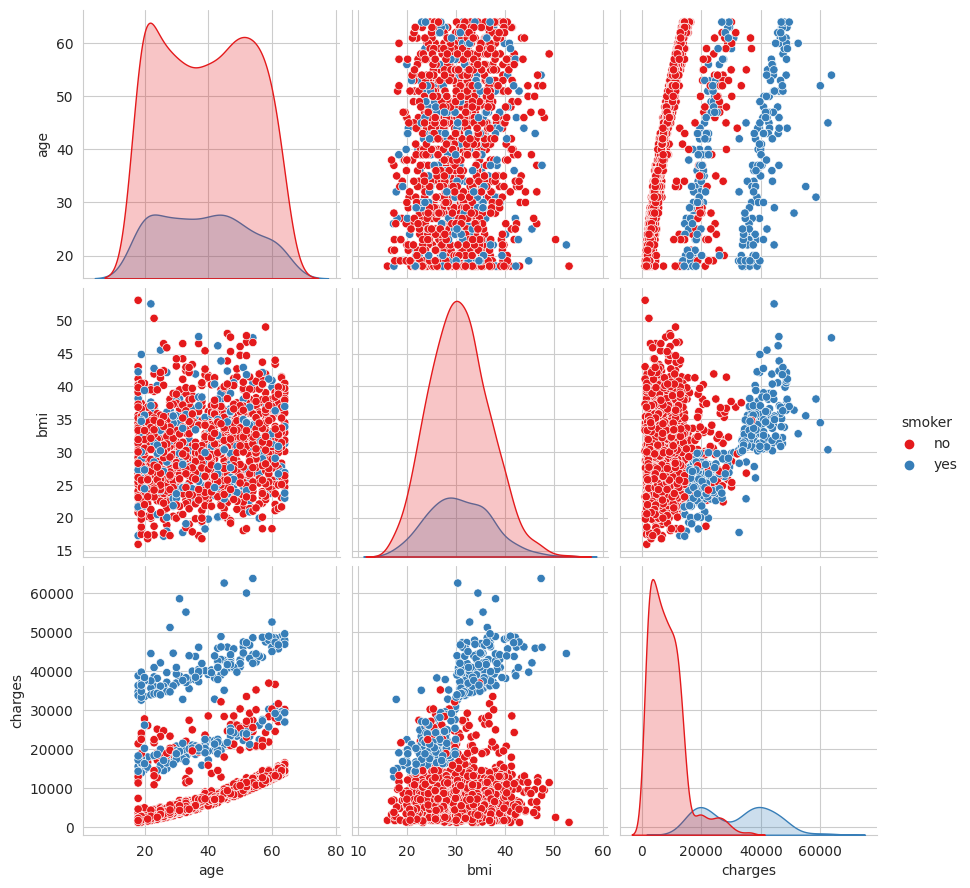

In [41]:
sns.set_style('whitegrid')

sns.pairplot(
    data[['age','bmi','charges','smoker']],
    hue = 'smoker',
    height = 3,
    palette='Set1'
)
plt.show()

In [42]:
data.head(3)

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


One-Hot Encoding

In [44]:
data = pd.get_dummies(data)

In [45]:
data.columns

Index(['age', 'bmi', 'children', 'charges', 'gender_female', 'gender_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

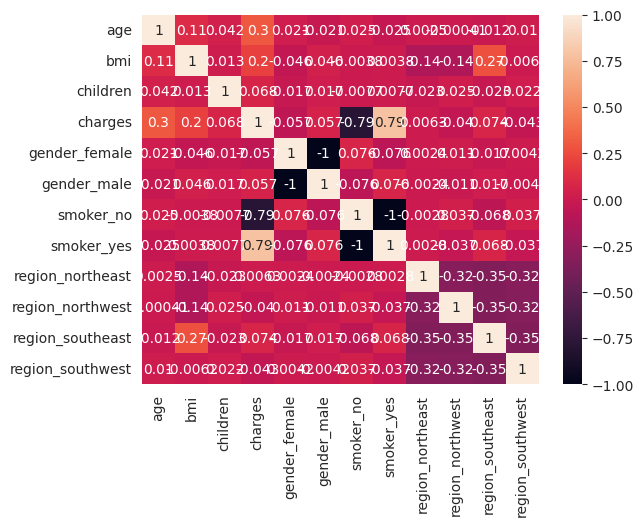

In [47]:
sns.heatmap(data.corr(),annot=True)
plt.show()


5. Building a Regression model

input variables are 'features' called 'independent variables'

output variable is the 'target' variable called 'dependent variable'

In [48]:
#assigning target variable 'charges' to y
y = data['charges']

In [49]:
#If we drop the target variable, the remainders are the features.
X = data.drop('charges',axis=1)

Splitting dataset into training and testing 

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    train_size= 0.80,
    random_state= 1)

building a model

In [52]:
from sklearn.linear_model import LinearRegression


In [53]:
#creating instance of LR class
lr = LinearRegression()

In [54]:
#building model using training data
lr.fit(X_train,y_train)

LinearRegression()

6. Model Evaluation

In [55]:
lr.score(X_test, y_test).round(3)


0.762

In [ ]:
lr.score(X_train,y_train).round(3)

0.748

mean squared error to evaluate model

In [ ]:
#first predict test data with predict method
y_pred = lr.predict(X_test)

In [57]:
from sklearn.metrics import mean_squared_error

In [58]:
import math

In [59]:
math.sqrt(mean_squared_error(y_test,y_pred))

5956.454717976427

7. Model Prediction

In [60]:
data_new = X_train[:1]
data_new

,age,bmi,children,gender_female,gender_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
216,53,26.6,0,True,False,True,False,False,True,False,False


predict data with model

In [61]:
lr.predict(data_new)


array([10508.41885042])

In [66]:
data_new1 = X_train[:2]
data_new1


,age,bmi,children,gender_female,gender_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
216,53,26.6,0,True,False,True,False,False,True,False,False
731,53,21.4,1,False,True,True,False,False,False,False,True


In [67]:
lr.predict(data_new1)

array([10508.41885042,  8494.95651816])

look at the real value

In [62]:
y_train[:1]

216    10355.641
Name: charges, dtype: float64

In [68]:
y_train[:2]

216    10355.641
731    10065.413
Name: charges, dtype: float64